# Verification example


In [1]:
from pathlib import Path
import metobs_toolkit

#Print out the version of the toolkit
print(metobs_toolkit.__version__)

0.4.1


### Importing observations

In [2]:
#Use observations for the same period as forecast
target_obs_data = Path(metobs_toolkit.BASE_PATH) / 'toolkit_tests' / 'testdata' / 'Vlinders_aug_2020.csv'

dataset = metobs_toolkit.Dataset() #Create a new dataset object
#Load the data
dataset.import_data_from_file(
                    template_file=metobs_toolkit.demo_template, #The template file
                    input_data_file=target_obs_data, #The data file
                    input_metadata_file=metobs_toolkit.demo_metadatafile, #The metadata file
                    )

Luchtdruk is present in the datafile, but not found in the template! This column will be ignored.
Neerslagintensiteit is present in the datafile, but not found in the template! This column will be ignored.
Neerslagsom is present in the datafile, but not found in the template! This column will be ignored.
Rukwind is present in the datafile, but not found in the template! This column will be ignored.
Luchtdruk_Zeeniveau is present in the datafile, but not found in the template! This column will be ignored.
Globe Temperatuur is present in the datafile, but not found in the template! This column will be ignored.
The following columns are present in the data file, but not in the template! They are skipped!
 ['Globe Temperatuur', 'Neerslagsom', 'Neerslagintensiteit', 'Luchtdruk', 'Luchtdruk_Zeeniveau', 'Rukwind']
The following columns are found in the metadata, but not in the template and are therefore ignored: 
['stad', 'sponsor', 'Network', 'benaming']
vlinder29 is not found in the metadat

## Import modeldata (gridded)

We use xarray ...

In [3]:
import xarray as xr


trg_netcdf = Path(metobs_toolkit.BASE_PATH) / 'toolkit_tests' / 'testdata' / 'ICMSHCSMK+0011h00m00s.sfx.nc'

ds = xr.open_dataset(trg_netcdf)
ds

<xarray.Dataset> Size: 14MB
Dimensions:         (y: 364, x: 412, level: 90, validtime: 1, reference_time: 1)
Coordinates:
    lon             (x, y) float64 1MB ...
  * x               (x) int64 3kB 0 1 2 3 4 5 6 ... 405 406 407 408 409 410 411
  * level           (level) int64 720B 1 2 3 4 5 6 7 8 ... 84 85 86 87 88 89 90
  * y               (y) int64 3kB 363 362 361 360 359 358 357 ... 6 5 4 3 2 1 0
  * validtime       (validtime) datetime64[ns] 8B 2020-08-02T11:00:00
    lat             (x, y) float64 1MB ...
  * reference_time  (reference_time) datetime64[ns] 8B 2020-08-02
Data variables:
    SFX.T2M_ISBA    (y, x) float64 1MB ...
    SFX.T2M_TEB     (y, x) float64 1MB ...
    SFX.MER10M      (y, x) float64 1MB ...
    SFX.Q2M_ISBA    (y, x) float64 1MB ...
    SFX.ZON10M      (y, x) float64 1MB ...
    SFX.Q2M         (y, x) float64 1MB ...
    SFX.RN          (y, x) float64 1MB ...
    SFX.Q2M_TEB     (y, x) float64 1MB ...
    SFX.H           (y, x) float64 1MB ...
    SFX.T2M         (y, x) float64 1MB ...
Attributes: (12/47)
    CADRE-DIMENSIONS:     [ 191  384  432   90 -215]
    CADRE-FRANKSCHMI:     [0. 0. 0. 0.]
    CADRE-REDPOINPOL:     [     0      1      1    412      1    364     16  ...
    CADRE-SINLATITUD:     [-1.00000000e+00  7.74944489e-01  7.94124810e-02  8...
    CADRE-FOCOHYBRID:     [1.01325000e+05 0.00000000e+00 2.68273558e-02 3.698...
    DATE-DES-DONNEES:     [2020    8    2    0    0    1   11    0   10   10 ...
    ...                   ...
    proj4_lat_1:          50.8
    proj4_lat_2:          50.8
    proj4_R:              6371229
    levels_ref_pressure:  101325.0
    levels_A:             [0.00000000e+00 2.68273558e-02 3.69808960e-02 4.851...
    levels_B:             [0.         0.         0.         0.         0.    ...

### reading multiple nc files

In [4]:
netcdffolder = Path(metobs_toolkit.BASE_PATH) / 'toolkit_tests' / 'testdata'
trg_ncfiles = netcdffolder.glob('*.sfx.nc')
ds = xr.open_mfdataset(trg_ncfiles)
ds

<xarray.Dataset> Size: 38MB
Dimensions:         (validtime: 3, y: 364, x: 412, level: 90, reference_time: 1)
Coordinates:
    lon             (x, y) float64 1MB dask.array<chunksize=(412, 364), meta=np.ndarray>
  * x               (x) int64 3kB 0 1 2 3 4 5 6 ... 405 406 407 408 409 410 411
  * level           (level) int64 720B 1 2 3 4 5 6 7 8 ... 84 85 86 87 88 89 90
  * y               (y) int64 3kB 363 362 361 360 359 358 357 ... 6 5 4 3 2 1 0
  * validtime       (validtime) datetime64[ns] 24B 2020-08-02T11:00:00 ... 20...
    lat             (x, y) float64 1MB dask.array<chunksize=(412, 364), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2020-08-02
Data variables:
    SFX.T2M_ISBA    (validtime, y, x) float64 4MB dask.array<chunksize=(1, 364, 412), meta=np.ndarray>
    SFX.T2M_TEB     (validtime, y, x) float64 4MB dask.array<chunksize=(1, 364, 412), meta=np.ndarray>
    SFX.MER10M      (validtime, y, x) float64 4MB dask.array<chunksize=(1, 364, 412), meta=np.ndarray>
    SFX.Q2M_ISBA    (validtime, y, x) float64 4MB dask.array<chunksize=(1, 364, 412), meta=np.ndarray>
    SFX.ZON10M      (validtime, y, x) float64 4MB dask.array<chunksize=(1, 364, 412), meta=np.ndarray>
    SFX.Q2M         (validtime, y, x) float64 4MB dask.array<chunksize=(1, 364, 412), meta=np.ndarray>
    SFX.RN          (validtime, y, x) float64 4MB dask.array<chunksize=(1, 364, 412), meta=np.ndarray>
    SFX.Q2M_TEB     (validtime, y, x) float64 4MB dask.array<chunksize=(1, 364, 412), meta=np.ndarray>
    SFX.H           (validtime, y, x) float64 4MB dask.array<chunksize=(1, 364, 412), meta=np.ndarray>
    SFX.T2M         (validtime, y, x) float64 4MB dask.array<chunksize=(1, 364, 412), meta=np.ndarray>
Attributes: (12/47)
    CADRE-DIMENSIONS:     [ 191  384  432   90 -215]
    CADRE-FRANKSCHMI:     [0. 0. 0. 0.]
    CADRE-REDPOINPOL:     [     0      1      1    412      1    364     16  ...
    CADRE-SINLATITUD:     [-1.00000000e+00  7.74944489e-01  7.94124810e-02  8...
    CADRE-FOCOHYBRID:     [1.01325000e+05 0.00000000e+00 2.68273558e-02 3.698...
    DATE-DES-DONNEES:     [2020    8    2    0    0    1   11    0   10   10 ...
    ...                   ...
    proj4_lat_1:          50.8
    proj4_lat_2:          50.8
    proj4_R:              6371229
    levels_ref_pressure:  101325.0
    levels_A:             [0.00000000e+00 2.68273558e-02 3.69808960e-02 4.851...
    levels_B:             [0.         0.         0.         0.         0.    ...

## Xarray --> Metobs ModelData

In [5]:
model = metobs_toolkit.ModelDataset(modelID='AromeCy48t3_13',
                            dataset=ds,
                            field_defenitions=metobs_toolkit.default_SFX_fields)
model

The following variables are unmapped and are removed from the modeldataset: ['SFX.Q2M_ISBA', 'SFX.MER10M', 'SFX.H', 'SFX.Q2M_TEB', 'SFX.RN', 'SFX.Q2M']


SFX.T2M
SFX.T2M_ISBA
SFX.ZON10M
SFX.T2M_TEB


Gridded output of AromeCy48t3_13:
 <xarray.Dataset> Size: 17MB
Dimensions:         (validtime: 3, y: 364, x: 412, level: 90, reference_time: 1)
Coordinates:
    lon             (x, y) float64 1MB dask.array<chunksize=(412, 364), meta=np.ndarray>
  * x               (x) int64 3kB 0 1 2 3 4 5 6 ... 405 406 407 408 409 410 411
  * level           (level) int64 720B 1 2 3 4 5 6 7 8 ... 84 85 86 87 88 89 90
  * y               (y) int64 3kB 363 362 361 360 359 358 357 ... 6 5 4 3 2 1 0
  * validtime       (validtime) datetime64[ns] 24B 2020-08-02T11:00:00 ... 20...
    lat             (x, y) float64 1MB dask.array<chunksize=(412, 364), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2020-08-02
Data variables:
    SFX.T2M         (validtime, y, x) float64 4MB dask.array<chunksize=(1, 364, 412), meta=np.ndarray>
    SFX.T2M_ISBA    (validtime, y, x) float64 4MB dask.array<chunksize=(1, 364, 412), meta=np.ndarray>
    SFX.ZON10M      (validtime, y, x) float64 4MB dask.a

## Plotting the modeldata


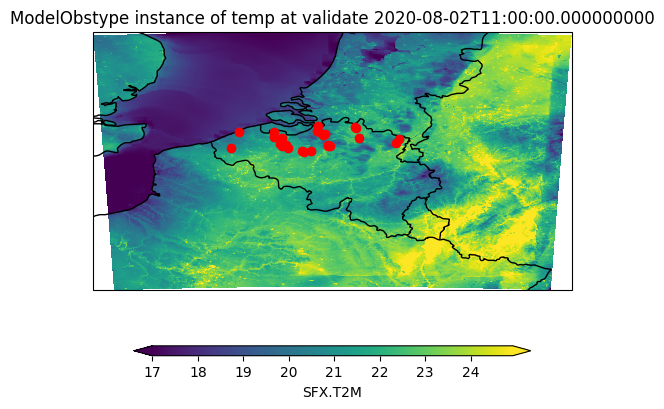

In [6]:
geoax = model.spatial_plot(
    target_fieldname='SFX.T2M',
    show_stations=dataset.stations,
    scatter_kwargs={'color':'red'})

## Extracting timeseries



In [7]:

dataset.get_NWP_timeseries_data(modeldataset=model)
dataset.get_info()

/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/dataset.py:1466: UserWarning: No timeseries could be extracted for Station instance of vlinder29, it has not coordinates!Skipped
  warnings.warn(f'No timeseries could be extracted for {sta}, it has not coordinates!Skipped')
/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/dataset.py:1466: UserWarning: No timeseries could be extracted for Station instance of vlinder30, it has not coordinates!Skipped
  warnings.warn(f'No timeseries could be extracted for {sta}, it has not coordinates!Skipped')
/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/dataset.py:1466: UserWarning: No timeseries could be extracted for Station instance of vlinder31, it has not coordinates!Skipped
  warnings.warn(f'No timeseries could be extracted for {sta}, it has not coordinates!Skipped')
/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/dataset.py:1466: UserWarning: No timeseries coul

                            General info of Dataset                             


--- Observational info ---

Dataset instance with:
  -57 number of stations
  -984960 number of records
  -4 types of sensor data are present.
  -Observations from 2020-08-01 00:00:00+00:00 -> 2020-08-15 23:55:00+00:00
  -Outlier info:
    -No QC outliers present.
  -Gaps info:
    -No gaps present.

--- Metadata info ---

  -57 number of stations
  -The following metadata is present: ['lat', 'lon', 'school', 'nnlat', 'nnlo...

--- Modeldata info ---

  -Modeldata is present for ['temp', 'wind_speed']
  -For period 2020-08-02 11:00:00+00:00 -> 2020-08-02 13:00:00+00:00



In [8]:
dataset.modeldatadf

value  \
datetime                  modelID        obstype    bandname   name                   
2020-08-02 11:00:00+00:00 AromeCy48t3_13 temp       SFX.T2M    vlinder01  22.011856   
                                                               vlinder02  22.585369   
                                                               vlinder03  22.870470   
                                                               vlinder04  22.457922   
                                                               vlinder05  22.036215   
...                                                                             ...   
2020-08-02 13:00:00+00:00 AromeCy48t3_13 wind_speed SFX.ZON10M vlinder24   3.006156   
                                                               vlinder25   3.831941   
                                                               vlinder26   2.852129   
                                                               vlinder27   3.061543   
                                                               vlinder28   3.292847   

                                                                                                                    details  
datetime                  modelID        obstype    bandname   name                                                          
2020-08-02 11:00:00+00:00 AromeCy48t3_13 temp       SFX.T2M    vlinder01  vlinder01_AromeCy48t3_13_SFX.T2M converted fro...  
                                                               vlinder02  vlinder02_AromeCy48t3_13_SFX.T2M converted fro...  
                                                               vlinder03  vlinder03_AromeCy48t3_13_SFX.T2M converted fro...  
                                                               vlinder04  vlinder04_AromeCy48t3_13_SFX.T2M converted fro...  
                                                               vlinder05  vlinder05_AromeCy48t3_13_SFX.T2M converted fro...  
...                                                                                                                     ...  
2020-08-02 13:00:00+00:00 AromeCy48t3_13 wind_speed SFX.ZON10M vlinder24  vlinder24_AromeCy48t3_13_SFX.ZON10M converted ...  
                                                               vlinder25  vlinder25_AromeCy48t3_13_SFX.ZON10M converted ...  
                                                               vlinder26  vlinder26_AromeCy48t3_13_SFX.ZON10M converted ...  
                                                               vlinder27  vlinder27_AromeCy48t3_13_SFX.ZON10M converted ...  
                                                               vlinder28  vlinder28_AromeCy48t3_13_SFX.ZON10M converted ...  

[312 rows x 2 columns]

<Axes: title={'center': 'temp data for station vlinder05'}, xlabel='Timestamps (in UTC)', ylabel='temp (degree_Celsius)'>

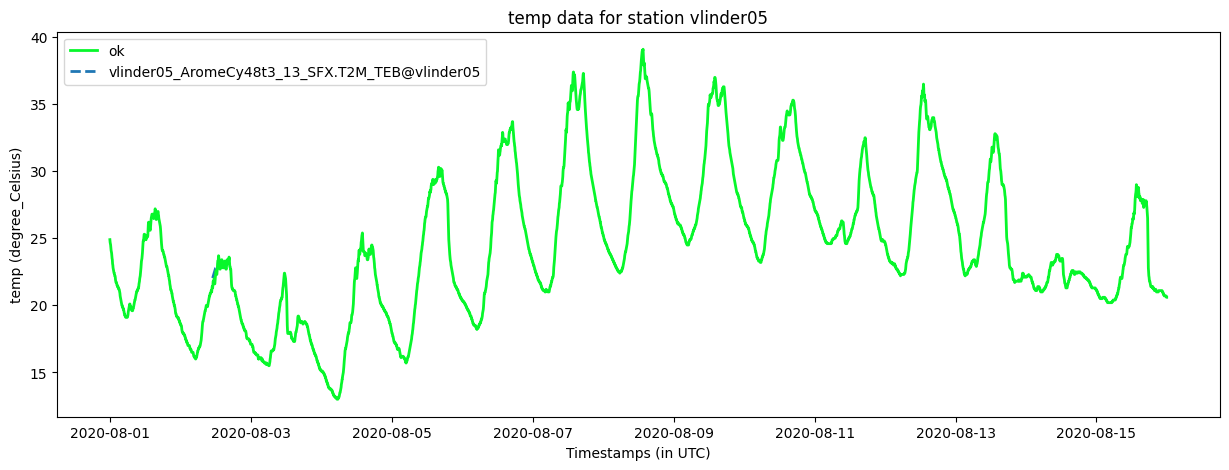

In [9]:
dataset.get_station('vlinder05').make_plot(obstype='temp', show_modeldata=True,
                                           trg_model_bandname="SFX.T2M")


# Verification scores

Scores are handled by the Verification class ...

In [11]:

ver = metobs_toolkit.Verification(dataset)

In [13]:
scoringdf = ver.get_scoring_df(target_obstype='temp',
                   groupby=['name'],
                   trg_bandname='SFX.T2M')
scoringdf

/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/verification.py:182: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(dropna=False)


name       score     
vlinder01  rmse          0.957640
           mae           0.855260
           bias          0.855260
           samplesize    3.000000
vlinder02  rmse          0.700754
                           ...   
vlinder27  samplesize    3.000000
vlinder28  rmse          1.229030
           mae           1.013455
           bias          1.013455
           samplesize    3.000000
Name: value, Length: 104, dtype: float64

<Axes: title={'center': 'rmse values grouped per score and name.'}, xlabel='name', ylabel='rmse'>

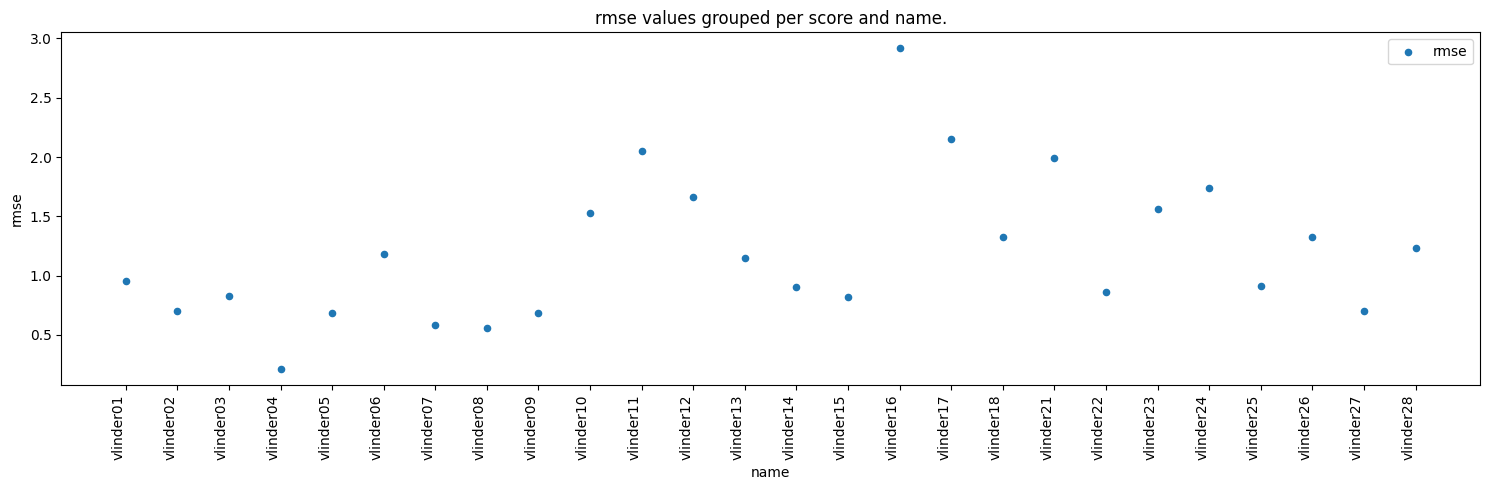

In [14]:
#Plot scoring
ver.plot_scoring(scoringdf=scoringdf,
                 xaxis_level='name',
                 color_level='score')

(<Axes: title={'center': 'Timeseries of temp (obs & fc)\n (originates from SFX.T2M)'}, ylabel='temp (degree_Celsius)'>,
 <Axes: title={'center': 'Residuals'}, ylabel='fc - obs (in degree_Celsius)'>)

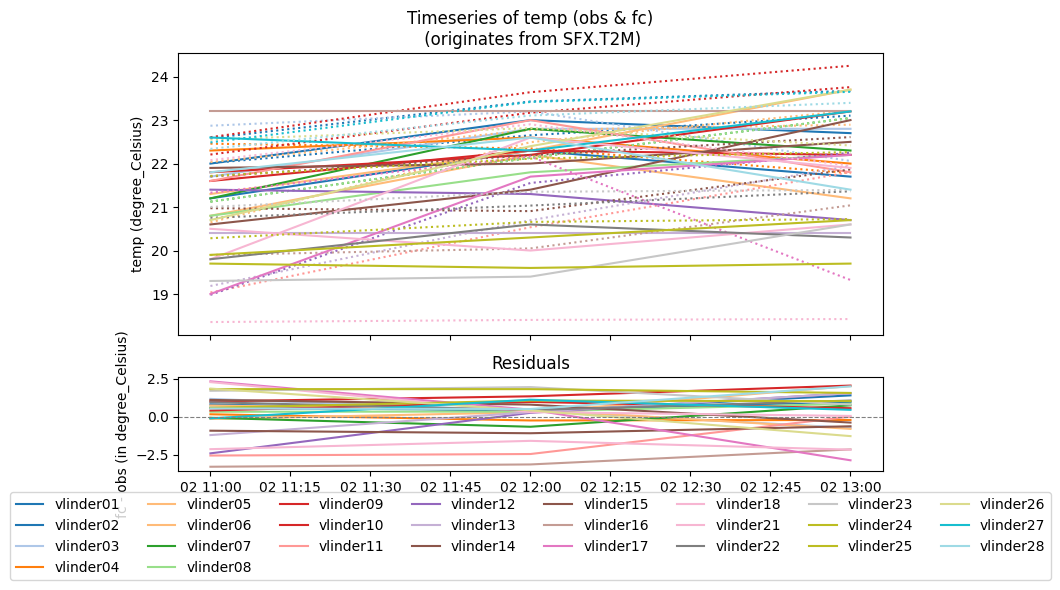

In [16]:
ver.plot_timeseries_of_obs_and_fc(trg_bandname='SFX.T2M')
